BIG MART SALES PREDICTION
GROUP MEMBERS

L001-Aadarsh Rawat
L002-Aditya Singh
L029-Pridwimn Jha
L032-Venkat Kalyan

###**IMPORT LIBRARIES**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

##**LOADING DATA**

In [27]:
train_data= pd.read_csv('/content/Train-2.csv')
test_data= pd.read_csv('/content/test-2.csv')
y= train_data.pop('Item_Outlet_Sales')

##**FILLING MISSING WEIGHT**

In [28]:
import pandas as pd
import numpy as np

def fill_missing_weights(df, ref_df):
    """Fills missing Item_Weight values in df using non-missing values from ref_df."""

    # Get unique Item_Identifiers with non-missing weights
    valid_weights = ref_df[ref_df['Item_Weight'].notna()][['Item_Identifier', 'Item_Weight']].drop_duplicates()

    # Fill missing weights using a loop and merging
    for index, row in df[df['Item_Weight'].isna()].iterrows():
        item_id = row['Item_Identifier']
        matching_weight = valid_weights[valid_weights['Item_Identifier'] == item_id]['Item_Weight']

        if not matching_weight.empty:
            df.loc[index, 'Item_Weight'] = matching_weight.iloc[0]

    return df

# Fill missing weights in train_data using itself as reference
train_data = fill_missing_weights(train_data, train_data)

# Fill missing weights in test_data using train_data as reference
test_data = fill_missing_weights(test_data, train_data)

##**MAPPING**

In [29]:
import pandas as pd

# Define mappings for Outlet_Type and Outlet_Establishment_Year
outlet_type_size_mapping = {
    'Supermarket Type3': 'Medium',
    'Supermarket Type2': 'Medium',
    'Grocery Store': 'Small'
}

establishment_year_size_mapping = {
    1987: 'High',
    1997: 'Small',
    2004: 'Small',
    1999: 'Small',
    2009: 'Small'
}

location_type_size_mapping = {
    'Tier 1': 'Small',
    'Tier 2': 'Small',
    'Tier 3': 'Medium'
}

# Function to determine outlet size based on mappings
def get_outlet_size(row):
    if pd.isna(row['Outlet_Size']):
        # Check by Outlet_Type
        if row['Outlet_Type'] in outlet_type_size_mapping:
            return outlet_type_size_mapping[row['Outlet_Type']]
        # Check by Outlet_Establishment_Year
        elif row['Outlet_Establishment_Year'] in establishment_year_size_mapping:
            return establishment_year_size_mapping[row['Outlet_Establishment_Year']]
        # Check by Outlet_Location_Type
        elif row['Outlet_Location_Type'] in location_type_size_mapping:
            return location_type_size_mapping[row['Outlet_Location_Type']]
    return row['Outlet_Size']

# Apply the function to each row
train_data['Outlet_Size'] = train_data.apply(get_outlet_size, axis=1)


In [30]:
import pandas as pd

# Define mappings for Outlet_Type, Outlet_Establishment_Year, and Outlet_Location_Type
outlet_type_size_mapping = {
    'Supermarket Type3': 'Medium',
    'Supermarket Type2': 'Medium',
    'Grocery Store': 'Small'
}

establishment_year_size_mapping = {
    1987: 'High',
    1997: 'Small',
    2004: 'Small',
    1999: 'Small',
    2009: 'Small'
}

location_type_size_mapping = {
    'Tier 1': 'Small',
    'Tier 2': 'Small',
    'Tier 3': 'Medium'
}

# Function to determine outlet size based on mappings
def get_outlet_size(row):
    if pd.isna(row['Outlet_Size']):
        # Check by Outlet_Type
        if row['Outlet_Type'] in outlet_type_size_mapping:
            return outlet_type_size_mapping[row['Outlet_Type']]
        # Check by Outlet_Establishment_Year
        elif row['Outlet_Establishment_Year'] in establishment_year_size_mapping:
            return establishment_year_size_mapping[row['Outlet_Establishment_Year']]
        # Check by Outlet_Location_Type
        elif row['Outlet_Location_Type'] in location_type_size_mapping:
            return location_type_size_mapping[row['Outlet_Location_Type']]
    return row['Outlet_Size']

# Apply the function to each row in test_data
test_data['Outlet_Size'] = test_data.apply(get_outlet_size, axis=1)


#EDA

1)UNIVARIATE ANALYSIS

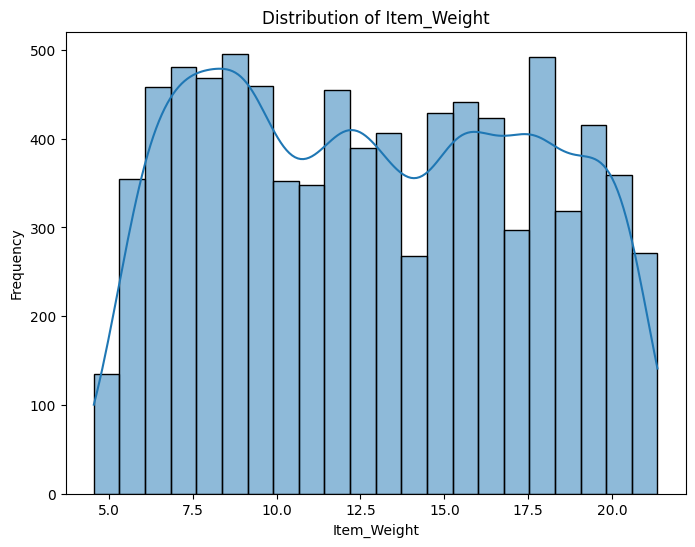

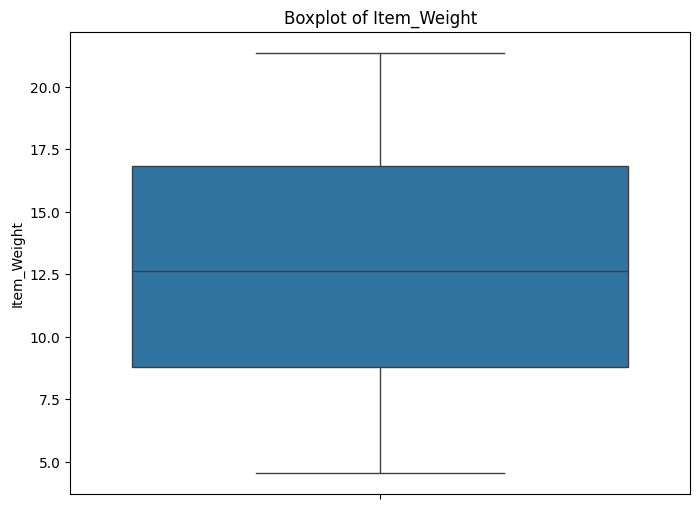

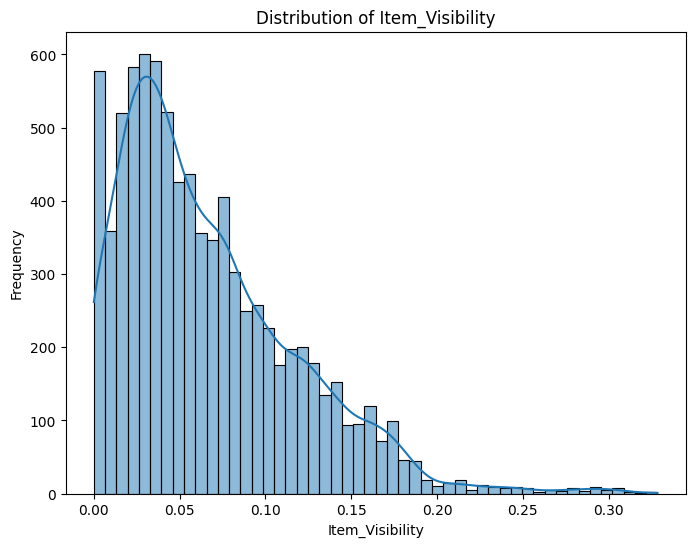

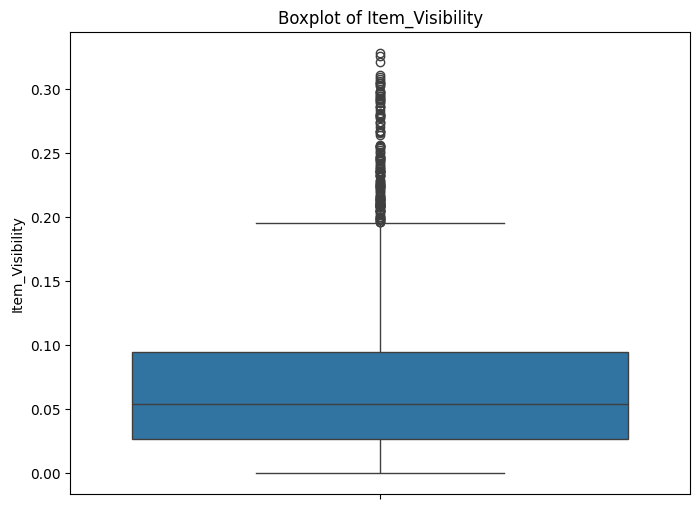

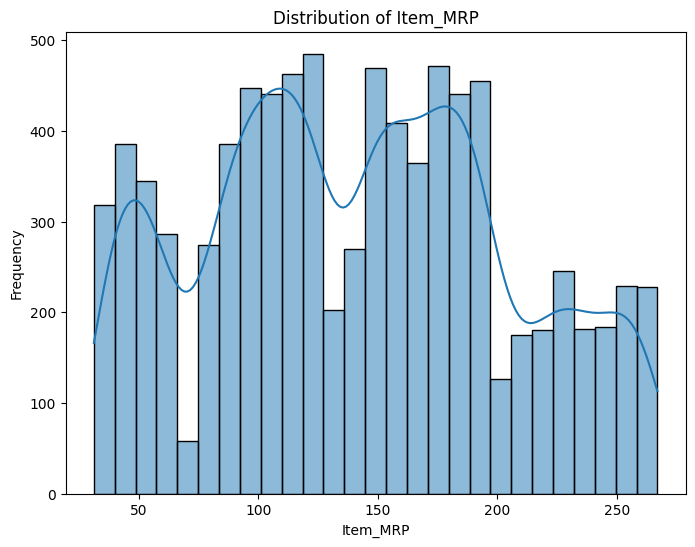

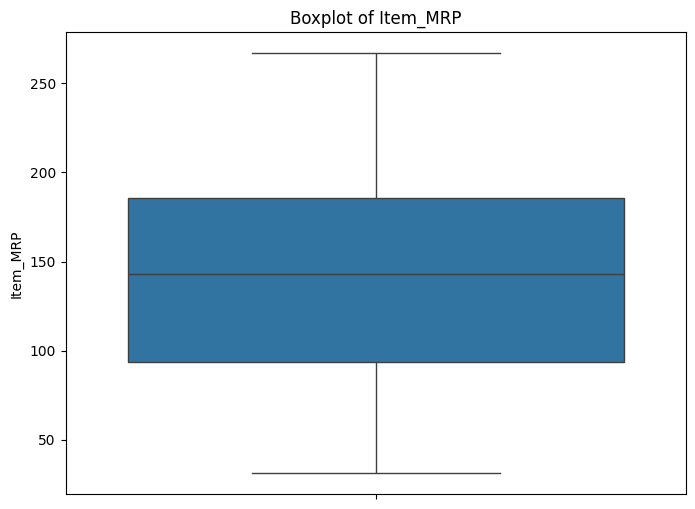

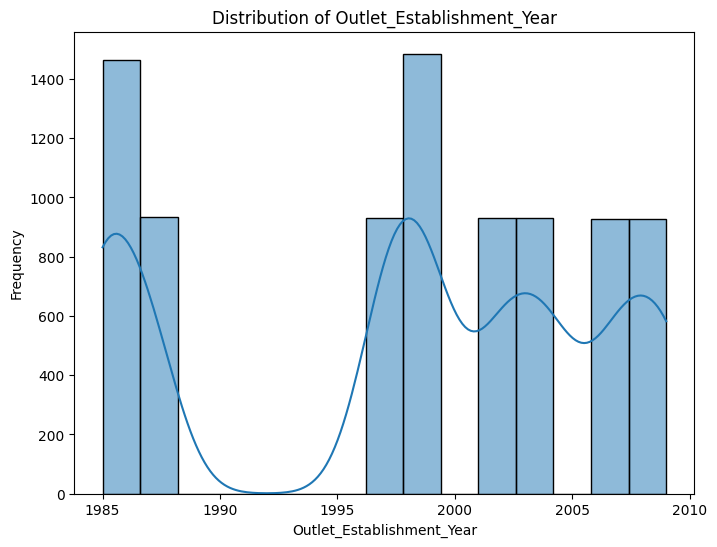

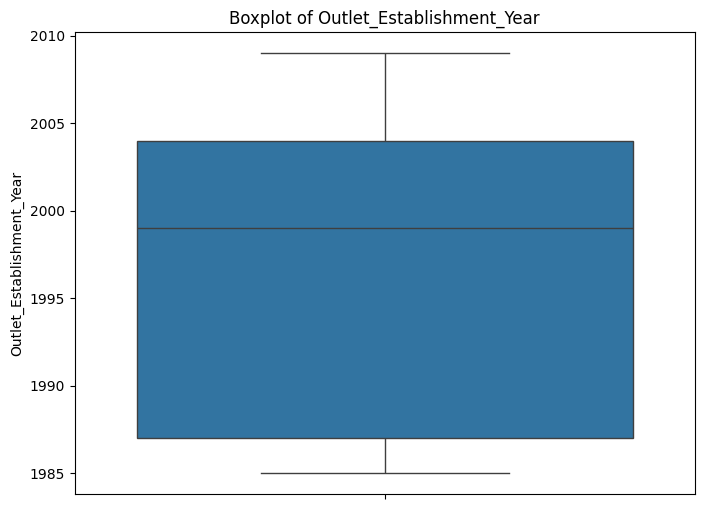

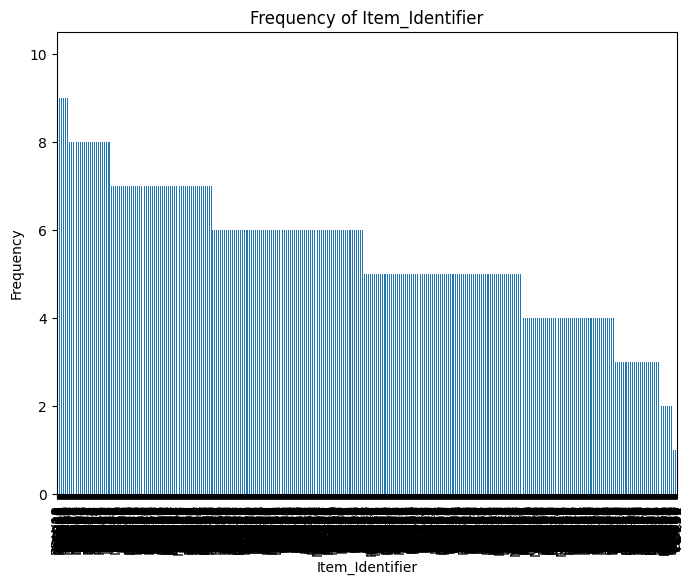

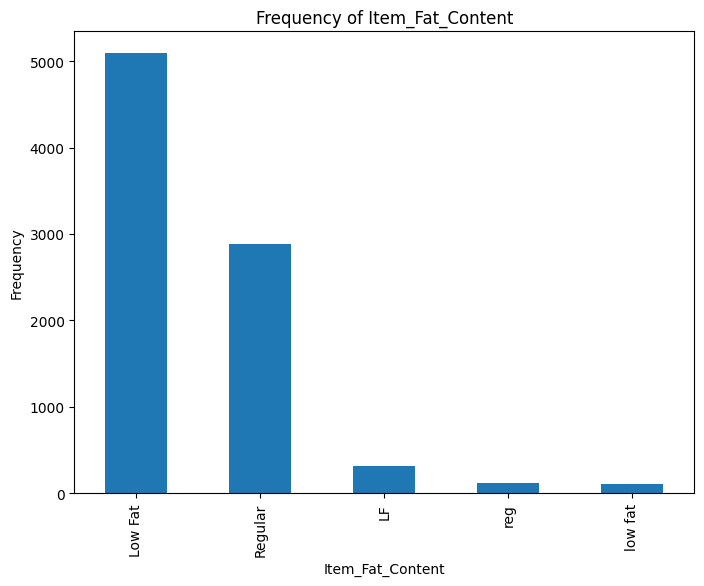

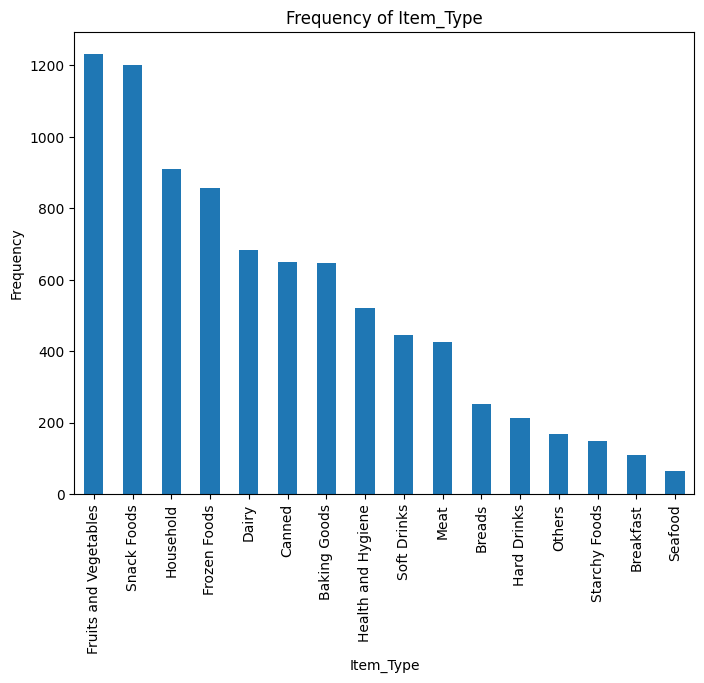

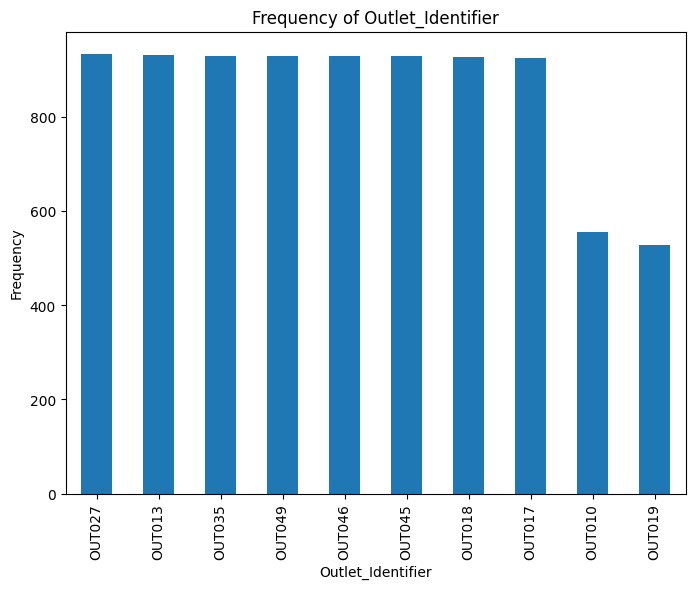

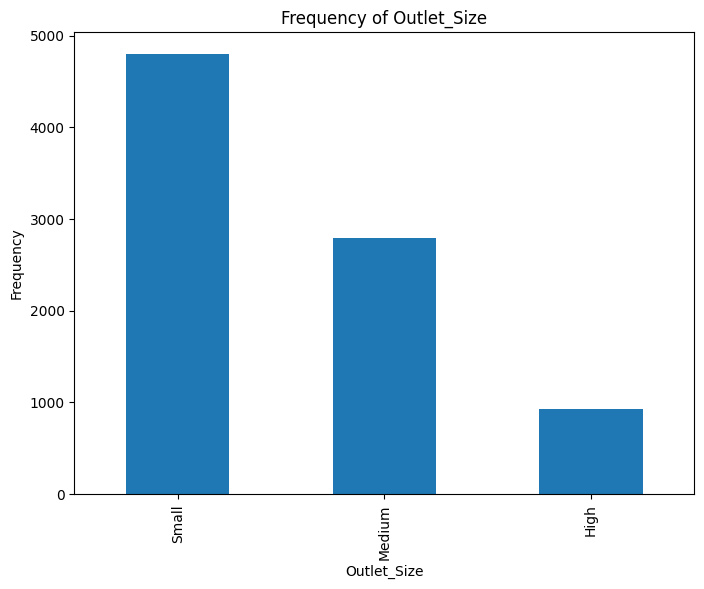

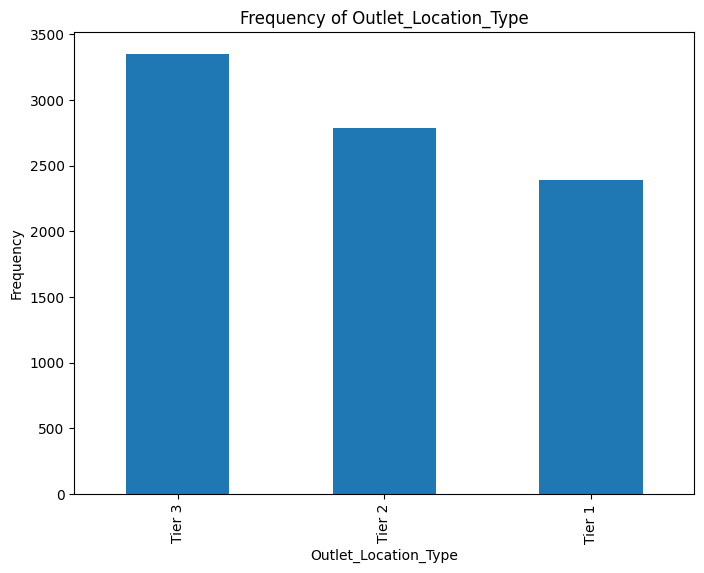

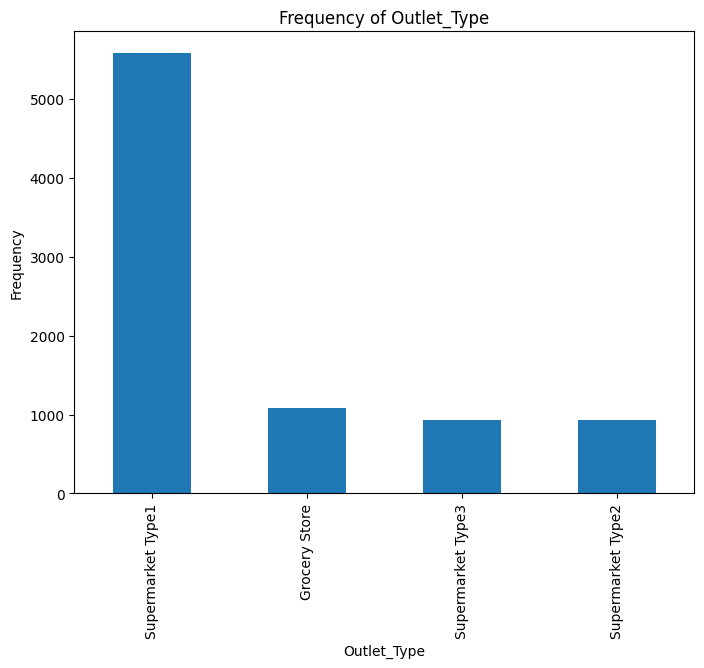

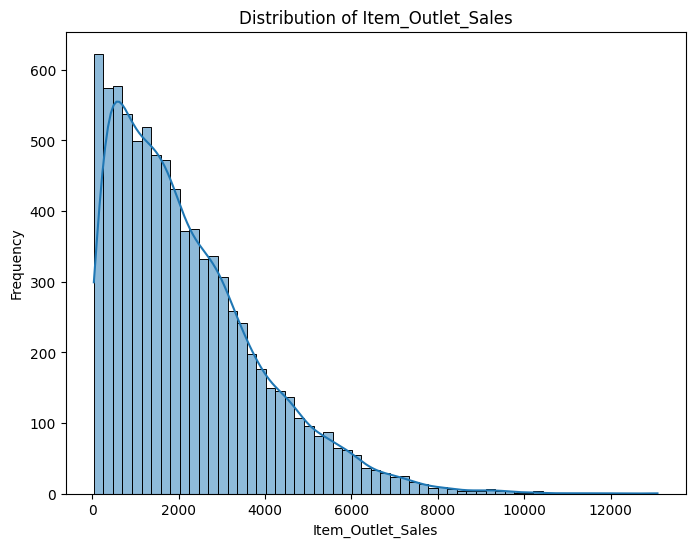

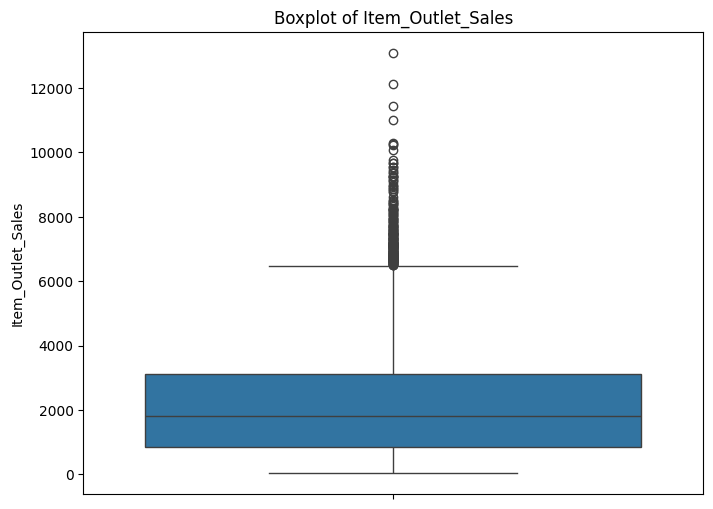

In [31]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' and 'y' are already defined from your previous code

# Univariate analysis for numerical features
numerical_features = train_data.select_dtypes(include=['number']).columns

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for detecting outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Univariate analysis for categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    train_data[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Analyze the target variable 'y'
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Boxplot of Item_Outlet_Sales')
plt.show()

#BIVARIATE ANALYSIS

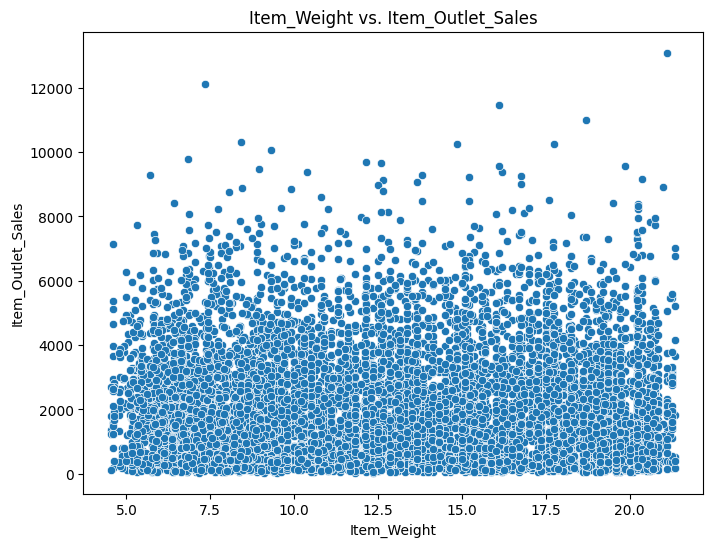

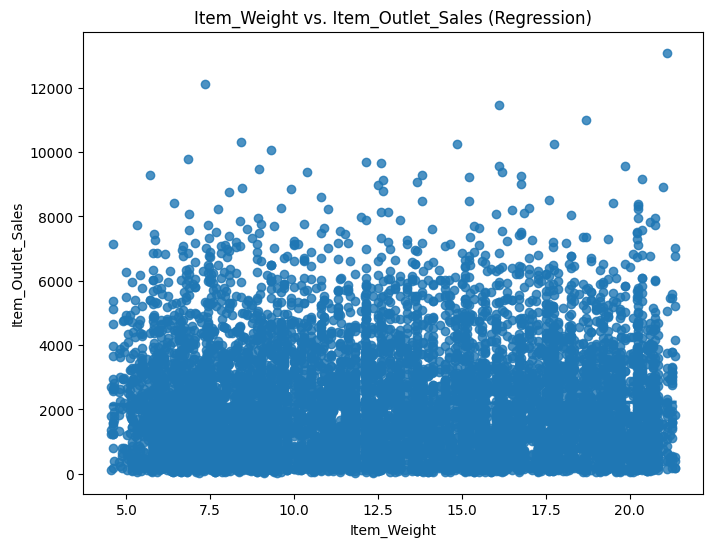

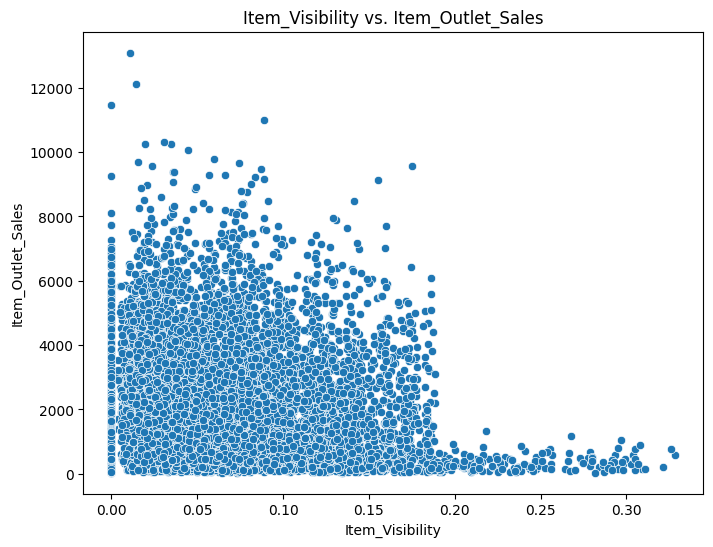

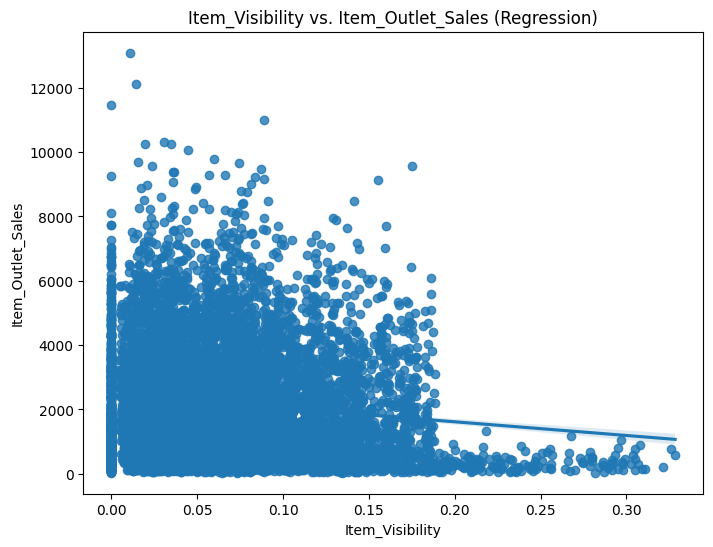

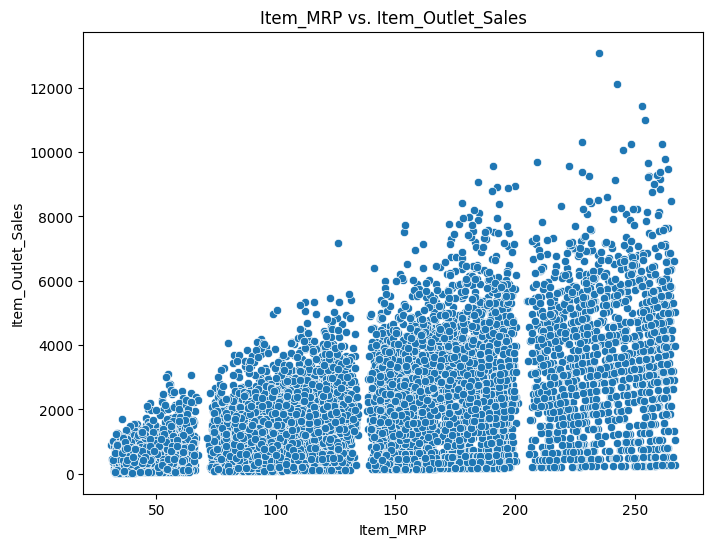

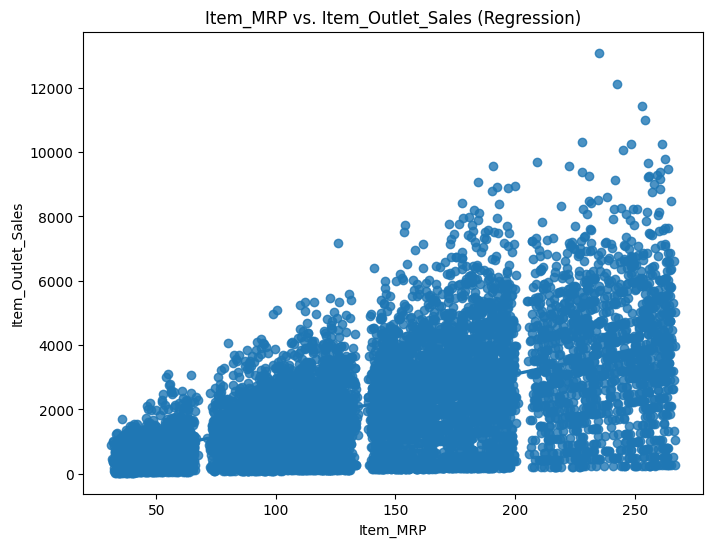

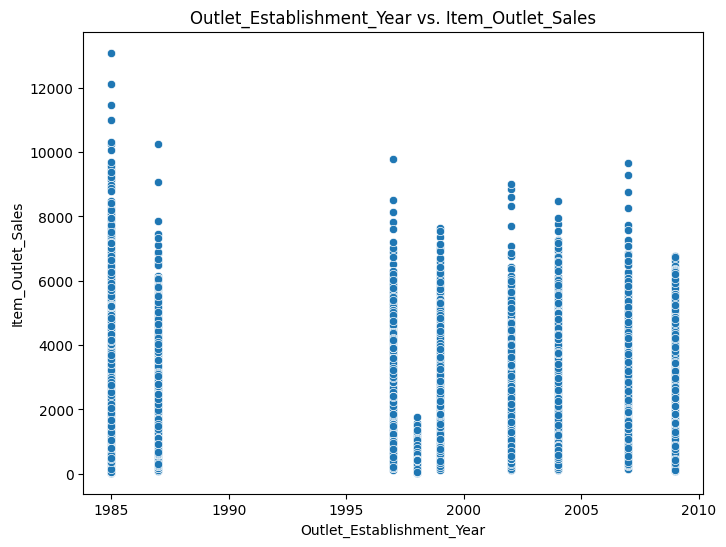

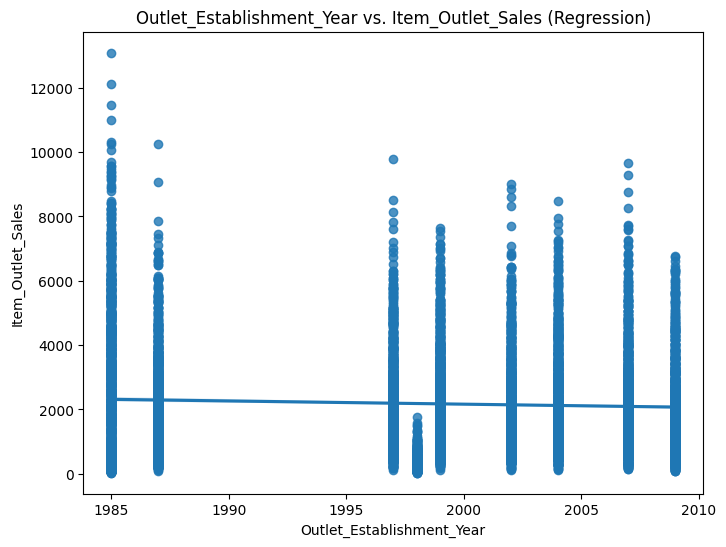

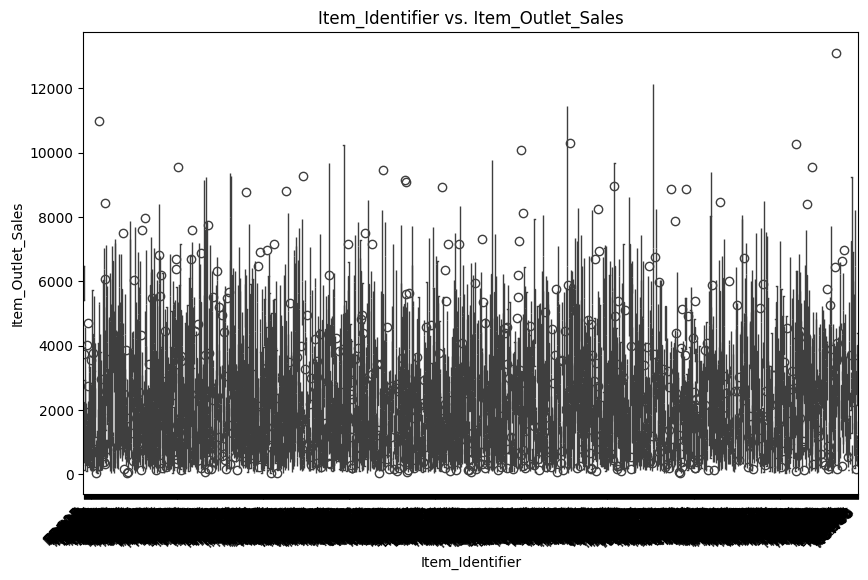

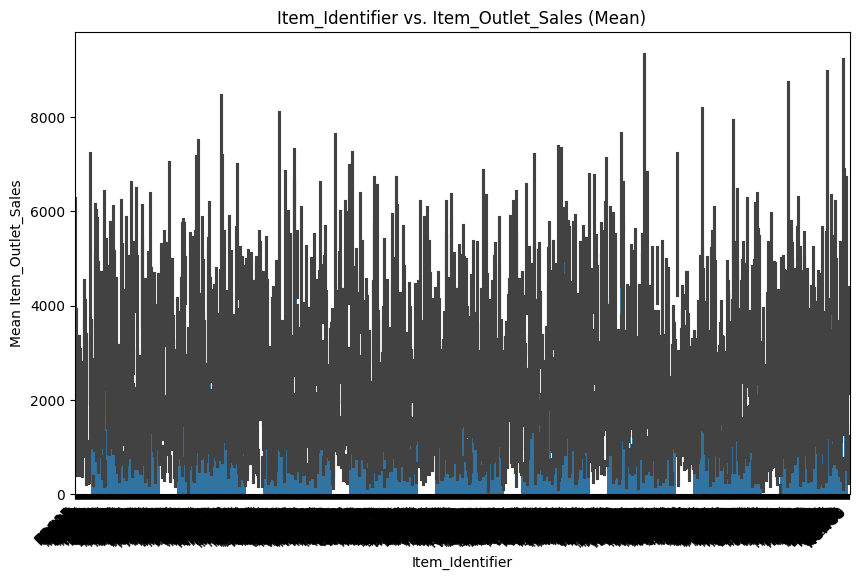

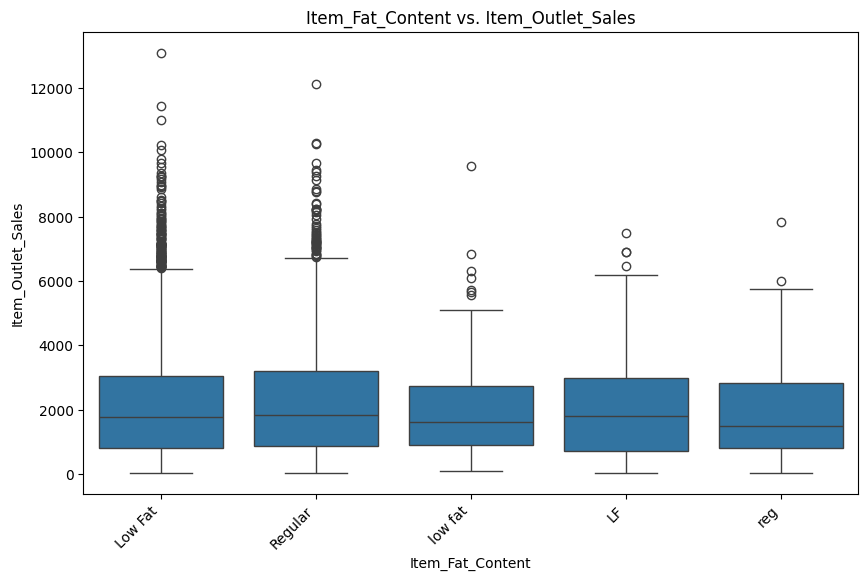

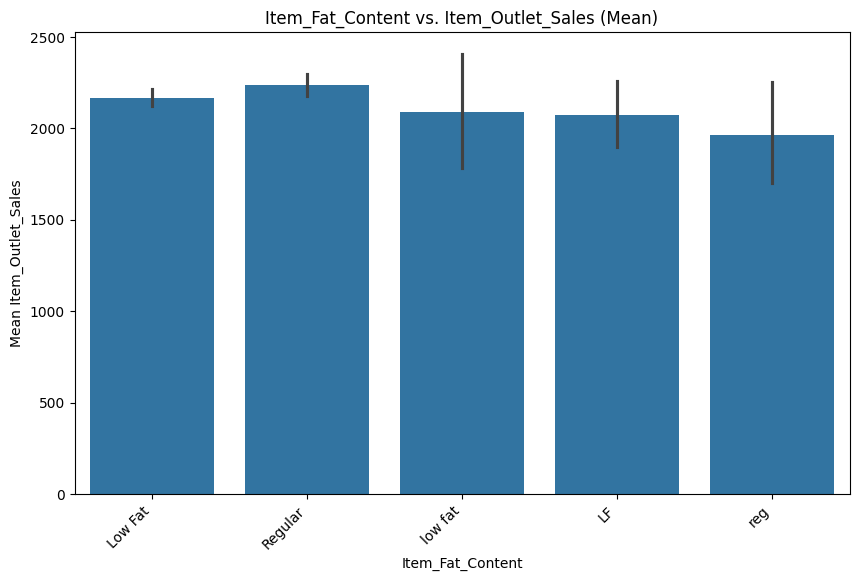

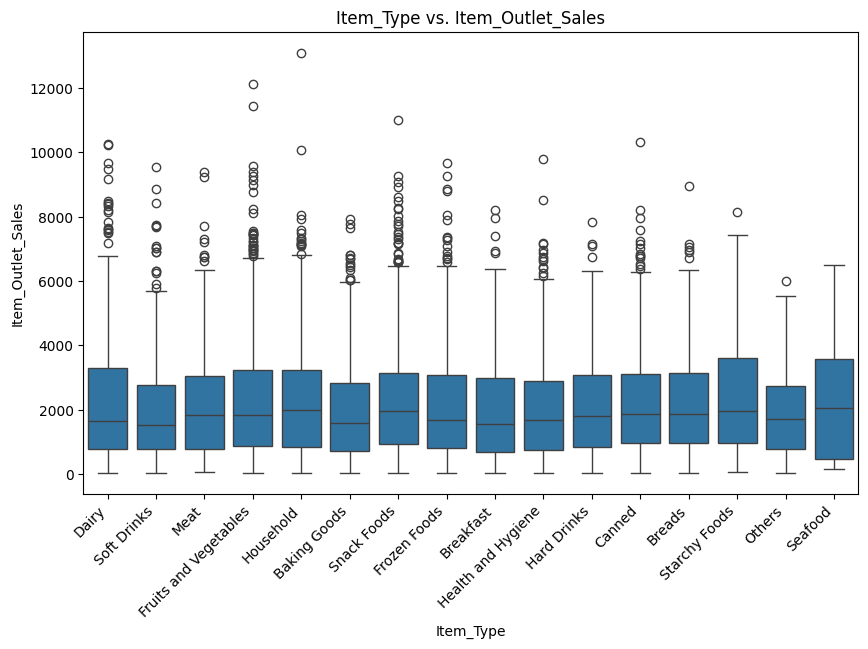

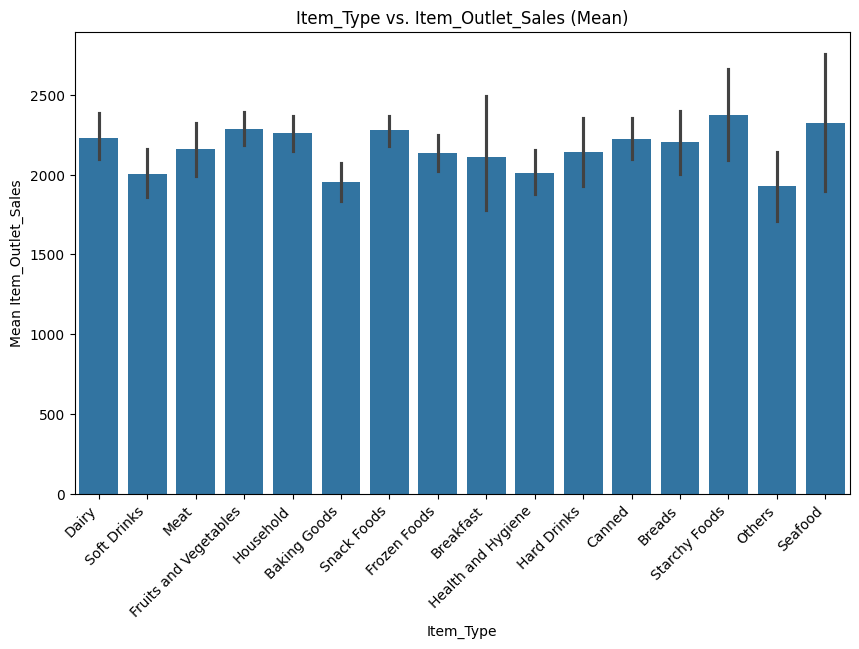

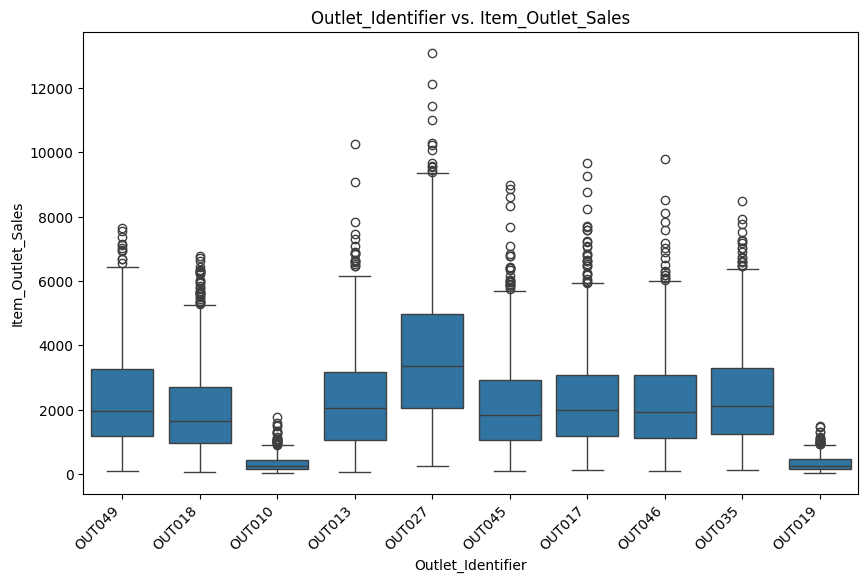

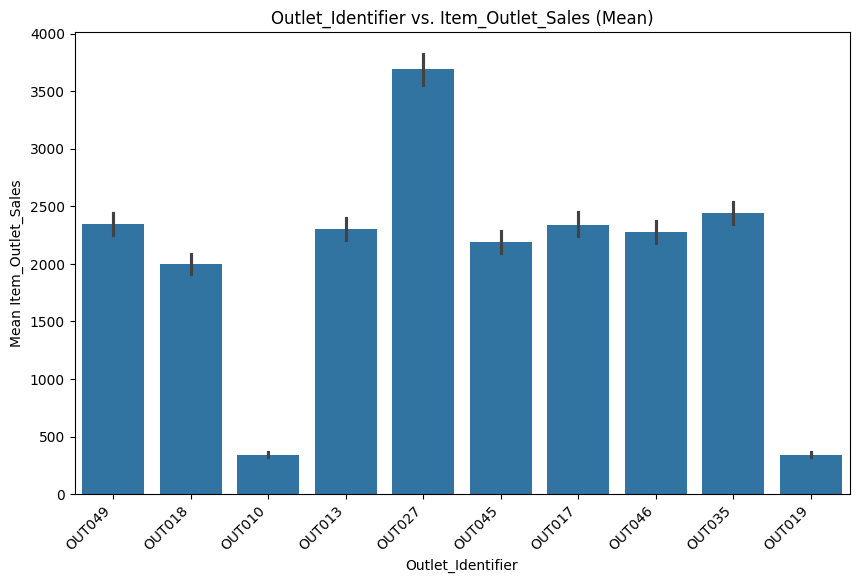

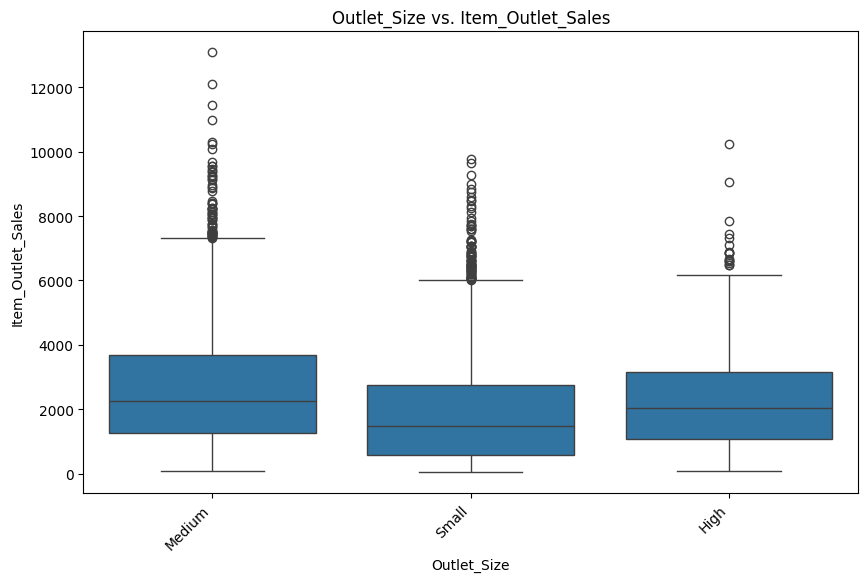

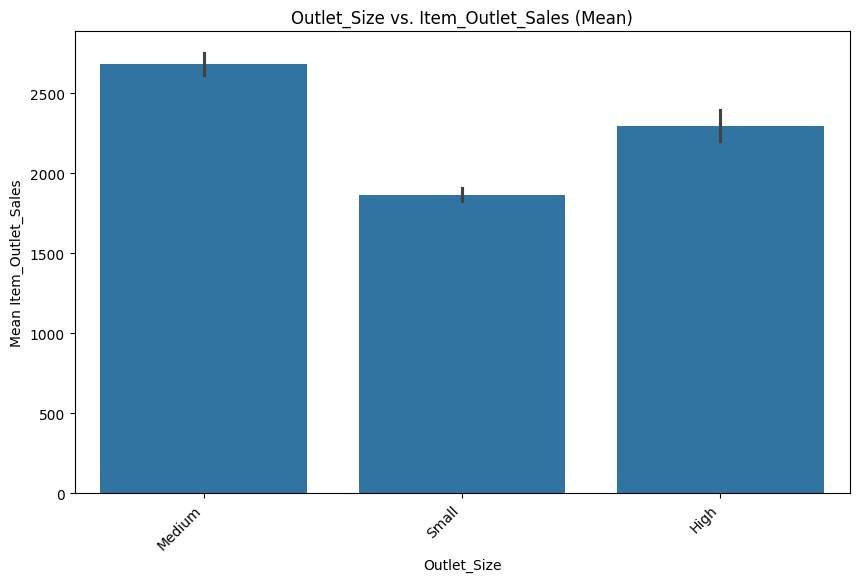

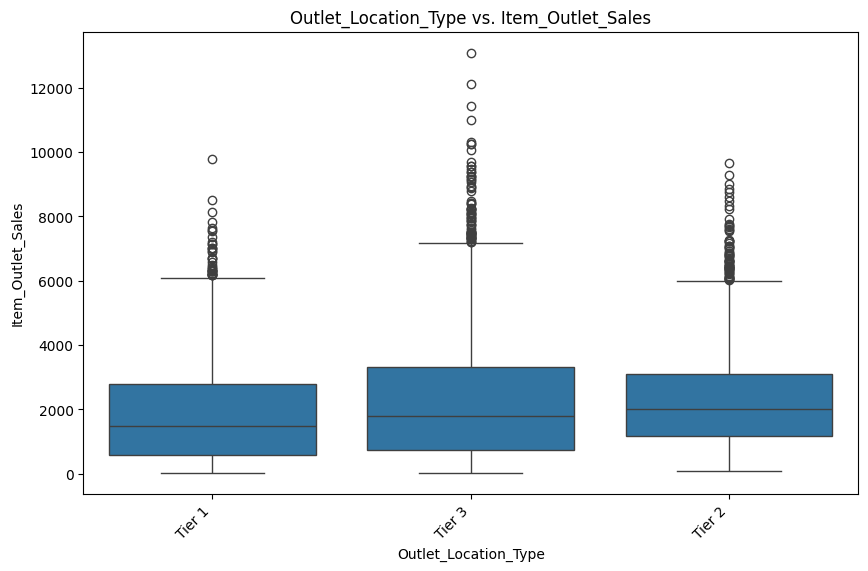

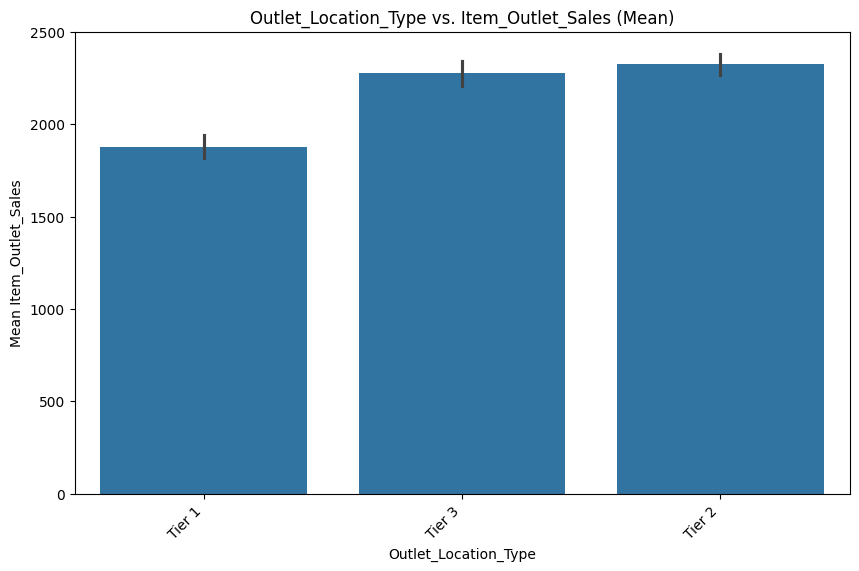

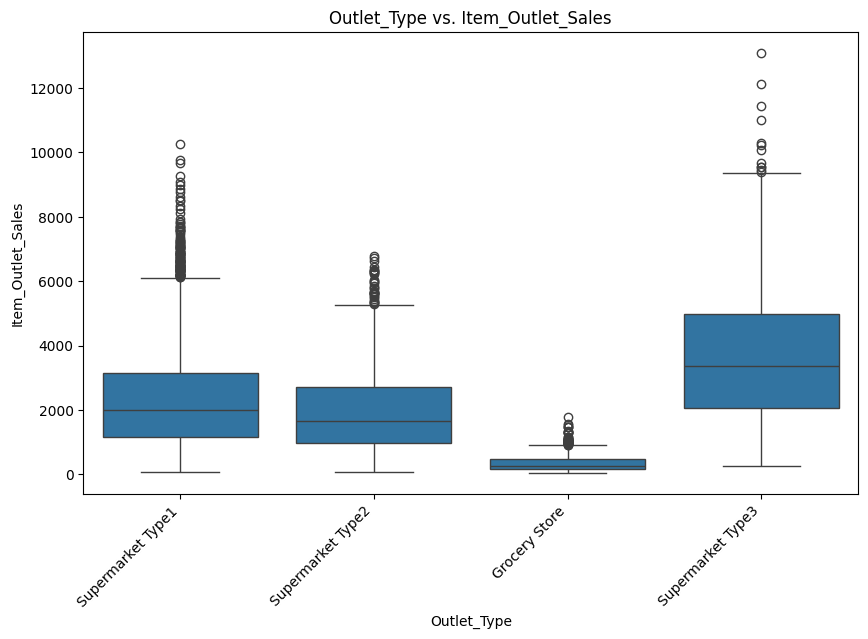

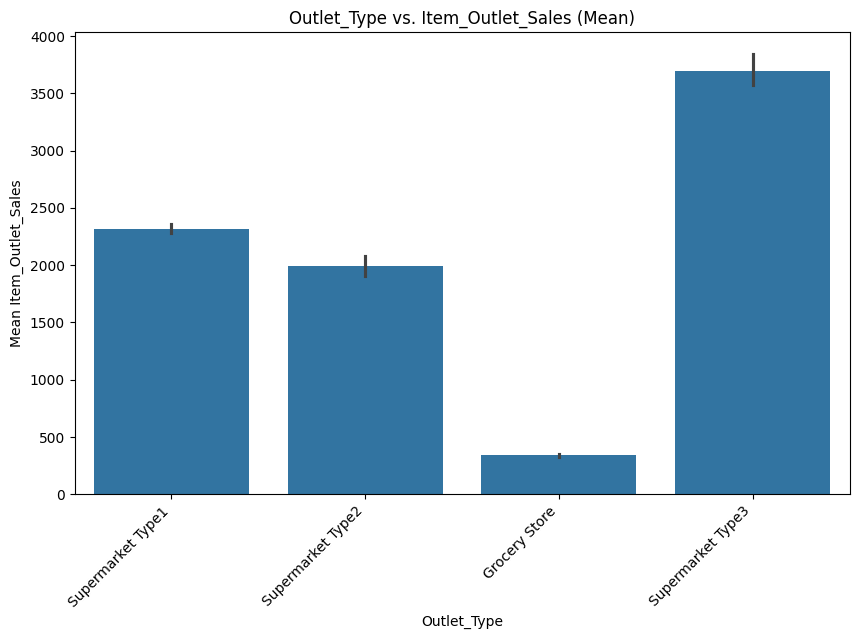

In [32]:


# Bivariate analysis for numerical features vs. target variable
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train_data[col], y=y)
    plt.title(f'{col} vs. Item_Outlet_Sales')
    plt.xlabel(col)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.regplot(x=train_data[col], y=y)  # Regression plot for trend
    plt.title(f'{col} vs. Item_Outlet_Sales (Regression)')
    plt.xlabel(col)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()


# Bivariate analysis for categorical features vs. target variable
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[col], y=y)
    plt.title(f'{col} vs. Item_Outlet_Sales')
    plt.xlabel(col)
    plt.ylabel('Item_Outlet_Sales')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=train_data[col], y=y)
    plt.title(f'{col} vs. Item_Outlet_Sales (Mean)')
    plt.xlabel(col)
    plt.ylabel('Mean Item_Outlet_Sales')
    plt.xticks(rotation=45, ha='right')
    plt.show()

#OUTLIER TREATMENT

In [33]:

def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

for col in numerical_features:
    train_data = treat_outliers_iqr(train_data, col)


#NULL VALUES TREATMENT

In [34]:

print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64
Item_Identifier              0
Item_Weight                  1
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


##**DATA PREPROCESSING**

In [35]:
categorical_col= train_data.select_dtypes('object').columns
train_data.loc[:,categorical_col]= train_data.loc[:,categorical_col] # Changed 'categor' to 'categorical_col'

In [36]:
categorical_col= train_data.select_dtypes('object').columns
train_data.loc[:,categorical_col]= train_data.loc[:,categorical_col].astype('str')
test_data.loc[:,categorical_col]= test_data.loc[:,categorical_col].astype('str')

##**TRAIN_TEST_SPLIT**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=42)

##**MODEL TRAINING**

In [38]:
!pip install catboost

In [39]:
from catboost import CatBoostRegressor
import numpy as np

# initialize the model
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=6,\
                          loss_function='RMSE', cat_features=list(categorical_col),nan_mode='Min')

# fit the model on the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), logging_level='Silent',plot=True)

# make predictions on the test set
y_pred = cat_model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

RMSE:  1016.4657780132325


## **Feature importance**

In [40]:
pd.DataFrame(train_data.columns,cat_model.feature_importances_)

,0
1.182140,Item_Identifier
0.641135,Item_Weight
1.258273,Item_Fat_Content
0.598514,Item_Visibility
1.310090,Item_Type
50.373870,Item_MRP
19.709909,Outlet_Identifier
2.184288,Outlet_Establishment_Year
1.712715,Outlet_Size
1.664085,Outlet_Location_Type


In [41]:
prediction=cat_model.predict(test_data)

In [42]:
output = pd.DataFrame({'Item_Identifier': test_data.Item_Identifier,
                       'Outlet_Identifier': test_data.Outlet_Identifier,
                       'Item_Outlet_Sales': prediction})
output.to_csv('submission1.csv', index=False)

In [43]:
# submission error =  1150

In [44]:
new_data_frame= train_data.loc[:,['Item_MRP','Outlet_Identifier','Outlet_Type']]

In [45]:
categorical_col2= new_data_frame.select_dtypes('object').columns

In [46]:
X_train, X_test, y_train, y_test = train_test_split(new_data_frame, y, test_size=0.2, random_state=42)

In [47]:
from catboost import CatBoostRegressor
import numpy as np

# initialize the model
cat_model2 = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=6,\
                          loss_function='RMSE', cat_features=list(categorical_col2),nan_mode='Min')

# fit the model on the training data
cat_model2.fit(X_train, y_train, eval_set=(X_test, y_test), logging_level='Silent',plot=True)

# make predictions on the test set
y_pred = cat_model2.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

RMSE:  1017.475517465378


In [48]:
new_test_data= test_data.loc[:,['Item_MRP','Outlet_Identifier','Outlet_Type']]

In [49]:
prediction=cat_model2.predict(new_test_data)

In [51]:
output = pd.DataFrame({'Item_Identifier': test_data.Item_Identifier,
                       'Outlet_Identifier': test_data.Outlet_Identifier,
                       'Item_Outlet_Sales': prediction})
output.to_csv('FINAL_SUBMISSION_DWR.csv', index=False)